In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import nltk
import re
import csv
import nltk

In [49]:
data=pd.read_csv("/Users/mohamedmoulaye/Desktop/Text Classification folder/IMDB-Movie-Data.csv")

In [50]:
data.head(5)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [51]:
#Dropping unwanted columns
data=data.drop([
    'Rating',
    'Votes',
    'Metascore',
    'Runtime (Minutes)',
    'Revenue (Millions)',
    'Director',
    'Actors',
    'Year',
    'Rank'
    ],axis=1)

In [52]:
data.head(5)

,Title,Genre,Description
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te..."
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea..."
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...


In [53]:
data.columns

Index(['Title', 'Genre', 'Description'], dtype='object')

In [54]:
data['Description'][:10]

0    A group of intergalactic criminals are forced ...
1    Following clues to the origin of mankind, a te...
2    Three girls are kidnapped by a man with a diag...
3    In a city of humanoid animals, a hustling thea...
4    A secret government agency recruits some of th...
5    European mercenaries searching for black powde...
6    A jazz pianist falls for an aspiring actress i...
7    A has-been actor best known for playing the ti...
8    A true-life drama, centering on British explor...
9    A spacecraft traveling to a distant colony pla...
Name: Description, dtype: object

In [55]:
for txt in data['Description'][:10]:
    print(txt)


A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.
Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.
Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.
In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.
A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.
European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.
A jazz pianist falls for an aspiring

In [56]:
data.shape

(1000, 3)

In [57]:
data.dtypes

Title          object
Genre          object
Description    object
dtype: object

In [58]:
data.Genre.value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: Genre, Length: 207, dtype: int64

In [59]:
data['Genre'][0]

'Action,Adventure,Sci-Fi'

In [60]:
print(len(data))
print(data.shape)
a=data['Genre'].value_counts()[:20]
b=a.keys().tolist()
print(b)
df=data[data.Genre.isin(b)]
df=df.reset_index(drop=True)

1000
(1000, 3)
['Action,Adventure,Sci-Fi', 'Drama', 'Comedy,Drama,Romance', 'Comedy', 'Drama,Romance', 'Animation,Adventure,Comedy', 'Action,Adventure,Fantasy', 'Comedy,Drama', 'Comedy,Romance', 'Crime,Drama,Thriller', 'Crime,Drama,Mystery', 'Action,Adventure,Drama', 'Action,Crime,Drama', 'Horror,Thriller', 'Drama,Thriller', 'Adventure,Family,Fantasy', 'Biography,Drama,History', 'Action,Adventure,Comedy', 'Biography,Drama', 'Action,Comedy,Crime']


<AxesSubplot: xlabel='Count', ylabel='Genre'>

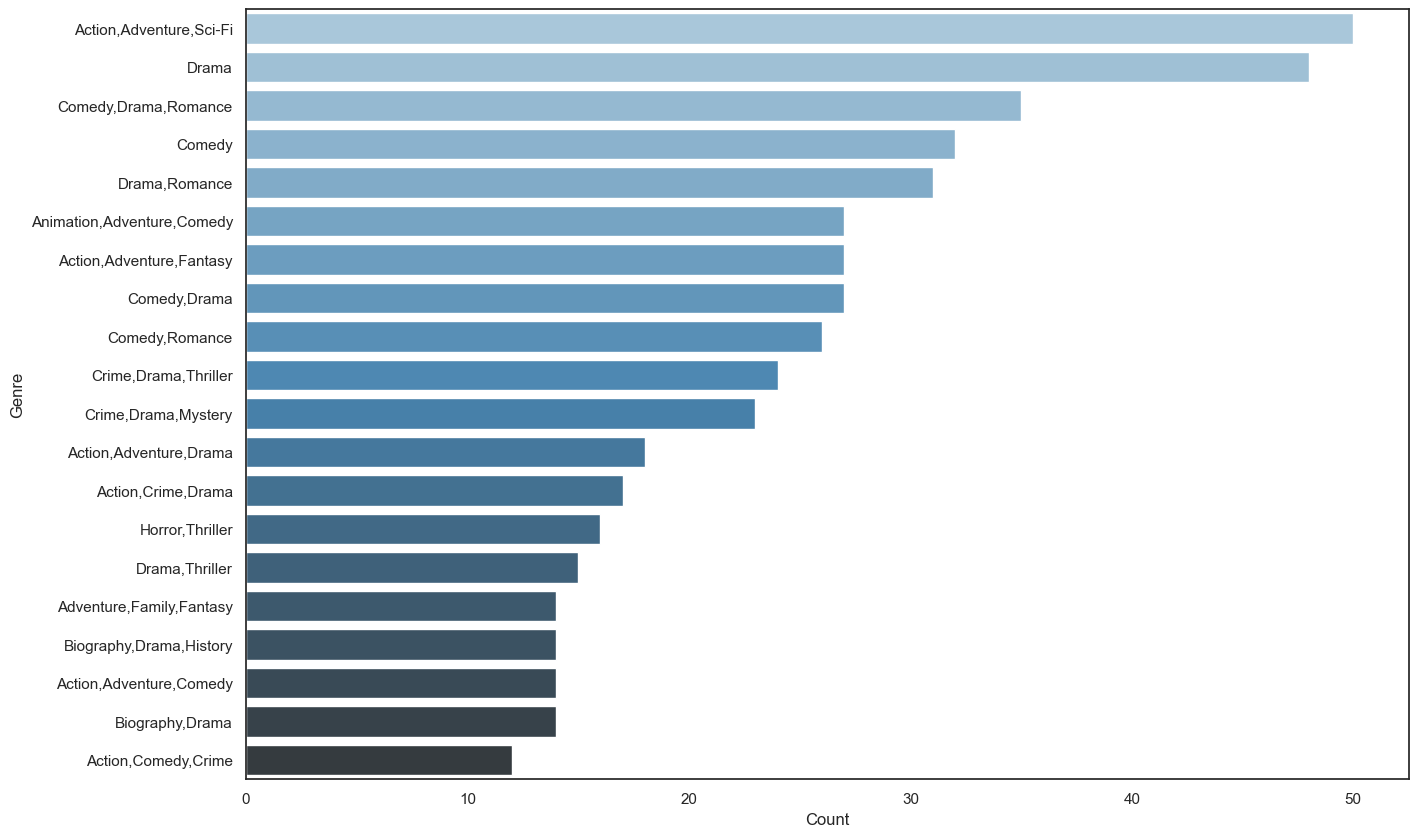

In [61]:
sns.set(style="white")
genre_to_count=pd.DataFrame({'Genre':a.index, 'Count':a.values})
plt.figure(figsize=(15,10))
sns.barplot(y="Genre", x="Count", data=genre_to_count,palette="Blues_d")

In [62]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [63]:
data['Cleaned_Description'] = data['Description'].apply(lambda x: clean_text(x))

In [64]:
data.head(5)

,Title,Genre,Description,Cleaned_Description
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,a group of intergalactic criminals are forced ...
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",following clues to the origin of mankind a tea...
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,three girls are kidnapped by a man with a diag...
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",in a city of humanoid animals a hustling theat...
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,a secret government agency recruits some of th...


In [65]:
data['Cleaned_Description'][:10]

0    a group of intergalactic criminals are forced ...
1    following clues to the origin of mankind a tea...
2    three girls are kidnapped by a man with a diag...
3    in a city of humanoid animals a hustling theat...
4    a secret government agency recruits some of th...
5    european mercenaries searching for black powde...
6    a jazz pianist falls for an aspiring actress i...
7    a has been actor best known for playing the ti...
8    a true life drama centering on british explore...
9    a spacecraft traveling to a distant colony pla...
Name: Cleaned_Description, dtype: object

In [66]:
for txt in data['Cleaned_Description'][:10]:
    print(txt)


a group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe
following clues to the origin of mankind a team finds a structure on a distant moon but they soon realize they are not alone
three girls are kidnapped by a man with a diagnosed distinct personalities they must try to escape before the apparent emergence of a frightful new th
in a city of humanoid animals a hustling theater impresarios attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists find that their lives will never be the same
a secret government agency recruits some of the most dangerous incarcerated super villains to form a defensive task force their first mission save the world from the apocalypse
european mercenaries searching for black powder become embroiled in the defense of the great wall of china against a horde of monstrous creatures
a jazz pianist falls for an aspiring actress in los ang

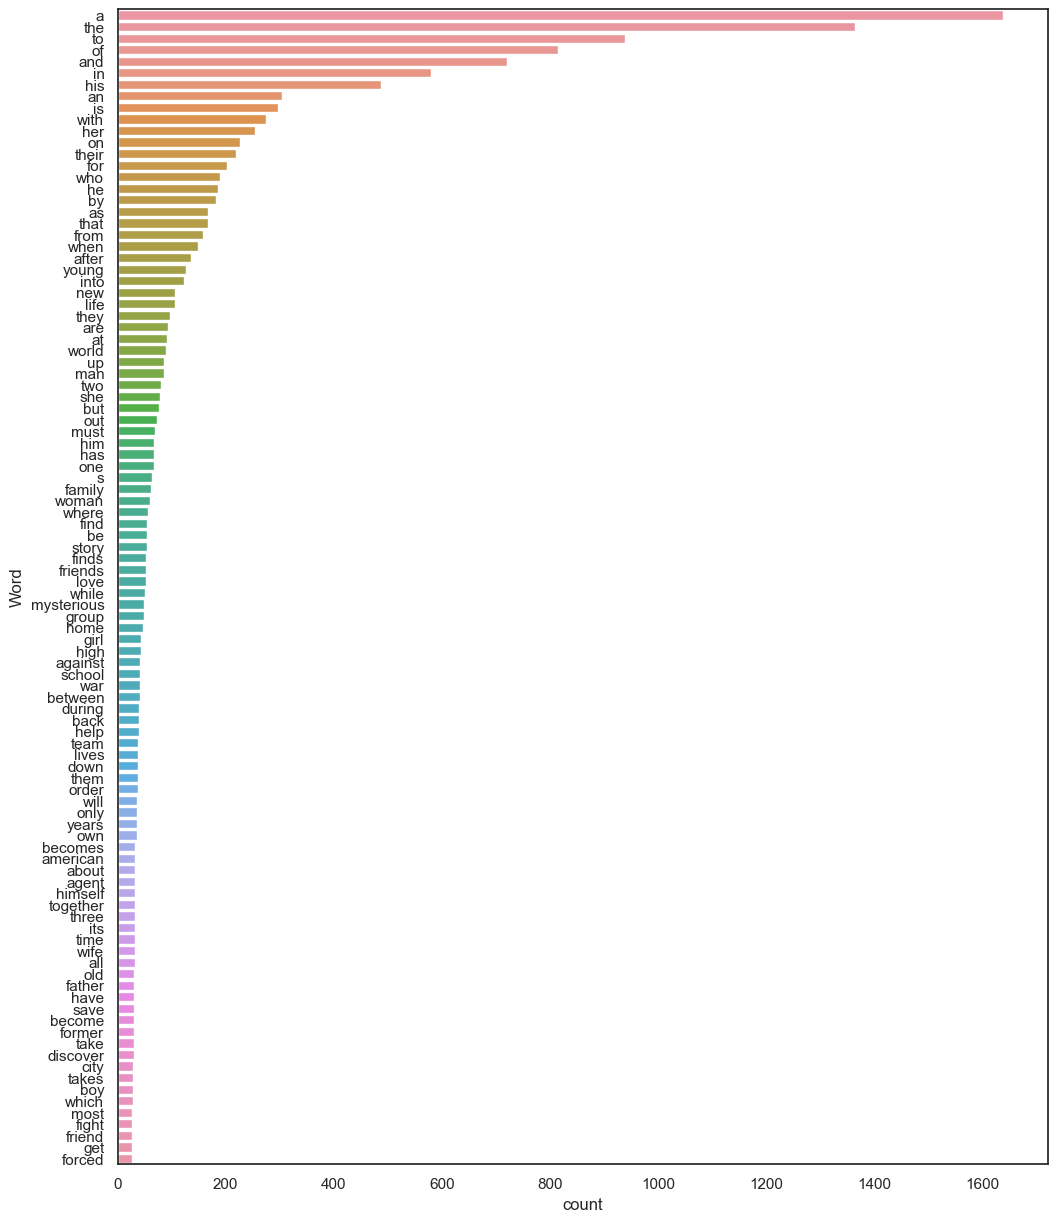

In [67]:
#find out the most frequent words in the Cleand_Description column:

def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
    # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['Cleaned_Description'], 100)

In [68]:
#Most of the above are stop words.. Removing these by downloading stop words from nltk library
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['Cleaned_Description'] = data['Cleaned_Description'].apply(lambda x: remove_stopwords(x))

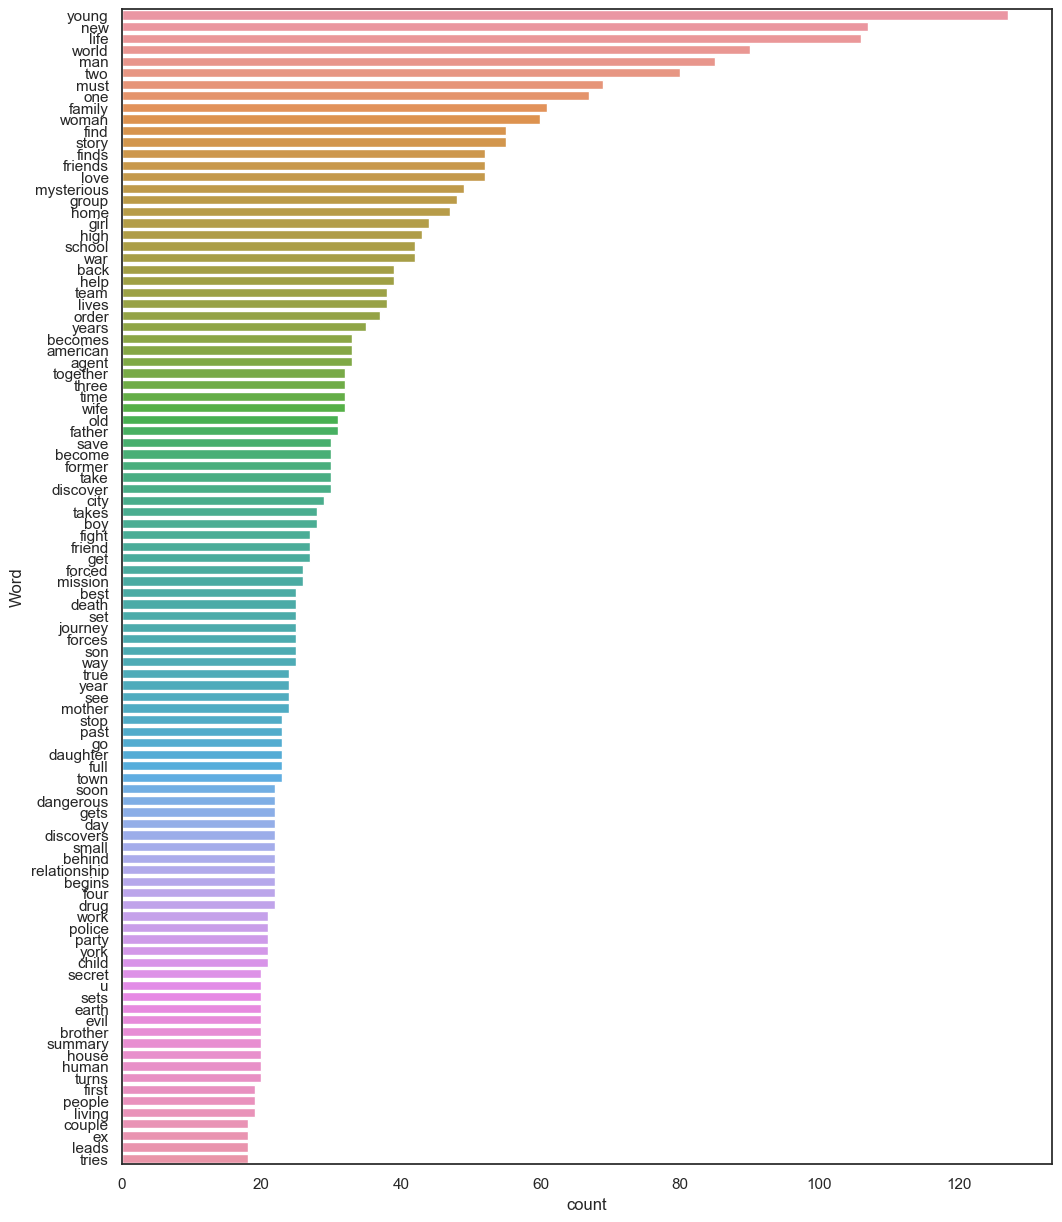

In [ ]:
# Now check the most frequent words after removing stop words
freq_words(data['Cleaned_Description'], 100)

In [ ]:
new_data = pd.DataFrame(columns = ['Title','Genre','Description'])
for i in range(len(data['Genre'])):  
    for word in data['Genre'][i].split(","): 
        new_data = new_data.append({'Title':data['Title'][i],'Genre':word,'Description':data['Cleaned_Description'][i]}, ignore_index = 1)    

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2555 entries, 0 to 2554
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        2555 non-null   object
 1   Genre        2555 non-null   object
 2   Description  2555 non-null   object
dtypes: object(3)
memory usage: 60.0+ KB


In [ ]:
new_data.head(20)

,Title,Genre,Description
0,Guardians of the Galaxy,Action,group intergalactic criminals forced work toge...
1,Guardians of the Galaxy,Adventure,group intergalactic criminals forced work toge...
2,Guardians of the Galaxy,Sci-Fi,group intergalactic criminals forced work toge...
3,Prometheus,Adventure,following clues origin mankind team finds stru...
4,Prometheus,Mystery,following clues origin mankind team finds stru...
5,Prometheus,Sci-Fi,following clues origin mankind team finds stru...
6,Split,Horror,three girls kidnapped man diagnosed distinct p...
7,Split,Thriller,three girls kidnapped man diagnosed distinct p...
8,Sing,Animation,city humanoid animals hustling theater impresa...
9,Sing,Comedy,city humanoid animals hustling theater impresa...


In [ ]:
new_data.shape

(2555, 3)

In [ ]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(new_data['Description']).toarray()
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2555, 5768)


In [ ]:
y=pd.get_dummies(new_data['Genre'])
y=y.iloc[:,1].values
print(y)
print(y.shape)

[0 1 0 ... 0 0 0]
(2555,)


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
print(model.predict(cv.fit_transform(["A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe."])))

In [ ]:
print(cv.predict(count_vect.transform(["Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th."])))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(y_test,y_pred)
confusion_m

array([[463,   0],
       [ 48,   0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9060665362035225